# Applied Machine Learning (Assignment # 1)

### DBSCAN Clustering

#### Importing the Dataset and Filling the Missing Values

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


In [2]:
file_path = "data/kmeans_dataset.csv"
data = pd.read_csv(file_path)

features = data.drop(columns=["Customer_ID"])

imputer = SimpleImputer(strategy="median")
features_imputed = imputer.fit_transform(features)


#### Normalizing the Data

In [3]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)


#### Finding the radius (epsilon) value

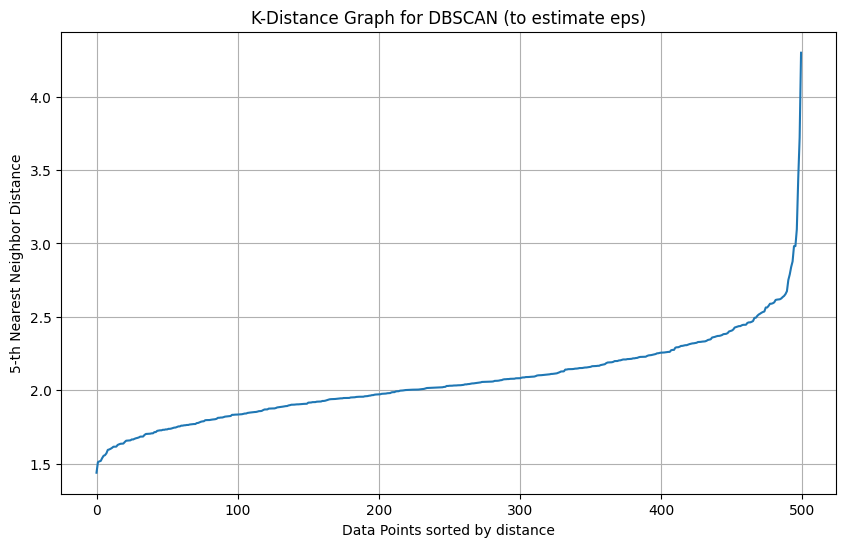

In [4]:
k = 5  # Minimum samples
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(features_scaled)
distances, indices = neighbors_fit.kneighbors(features_scaled)

# Plotting results
distances = np.sort(distances[:, k-1])
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'{k}-th Nearest Neighbor Distance')
plt.title('K-Distance Graph for DBSCAN (to estimate eps)')
plt.grid(True)
plt.show()

#### Applying DBSCAN

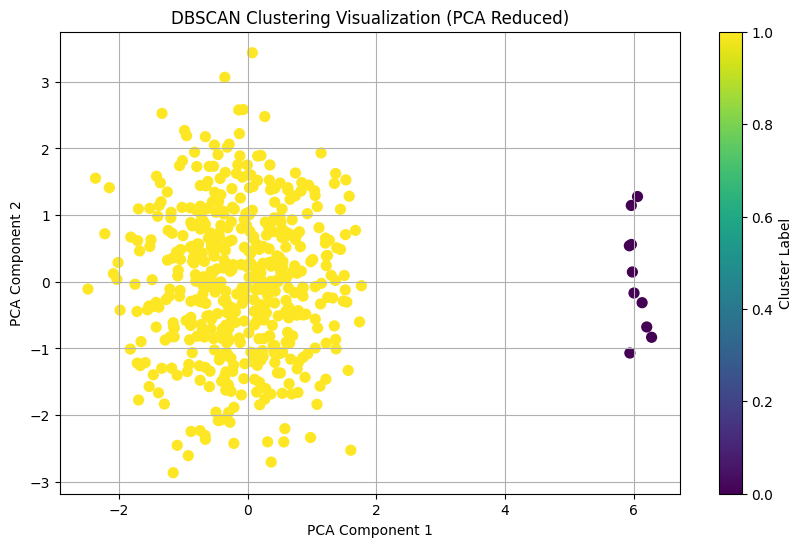

Cluster counts:
 Cluster
1    490
0     10
Name: count, dtype: int64


In [5]:
dbscan = DBSCAN(eps=3, min_samples=5)
clusters = dbscan.fit_predict(features_scaled)

# Cluster labels
data['Cluster'] = clusters

# Plotting results (via PCA due to multi-dimensions)
pca = PCA(n_components=2)
components = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(components[:, 0], components[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Visualization (PCA Reduced)')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()

print("Cluster counts:\n", data['Cluster'].value_counts())

#### Assigned the Cluster Labels

In [6]:
data['Cluster'] = clusters

cluster_averages = data.groupby('Cluster').mean(numeric_only=True)
print(cluster_averages)


         Customer_ID        Age  Annual_Income  Spending_Score  \
Cluster                                                          
0         208.000000  43.333333  299578.000000       34.000000   
1         251.367347  46.887446   80036.012931       49.528908   

         Website_Visits  Product_Categories_Purchased  Total_Purchase_Amount  \
Cluster                                                                        
0             14.200000                      5.700000           99756.000000   
1             15.954839                      5.406048           25479.458333   

         Average_Session_Duration  Return_Rate  Discount_Usage  
Cluster                                                         
0                       32.300000    29.141000       47.265556  
1                       30.629067    24.978061       49.046398  


#### Visualization to understand results with Heatmap

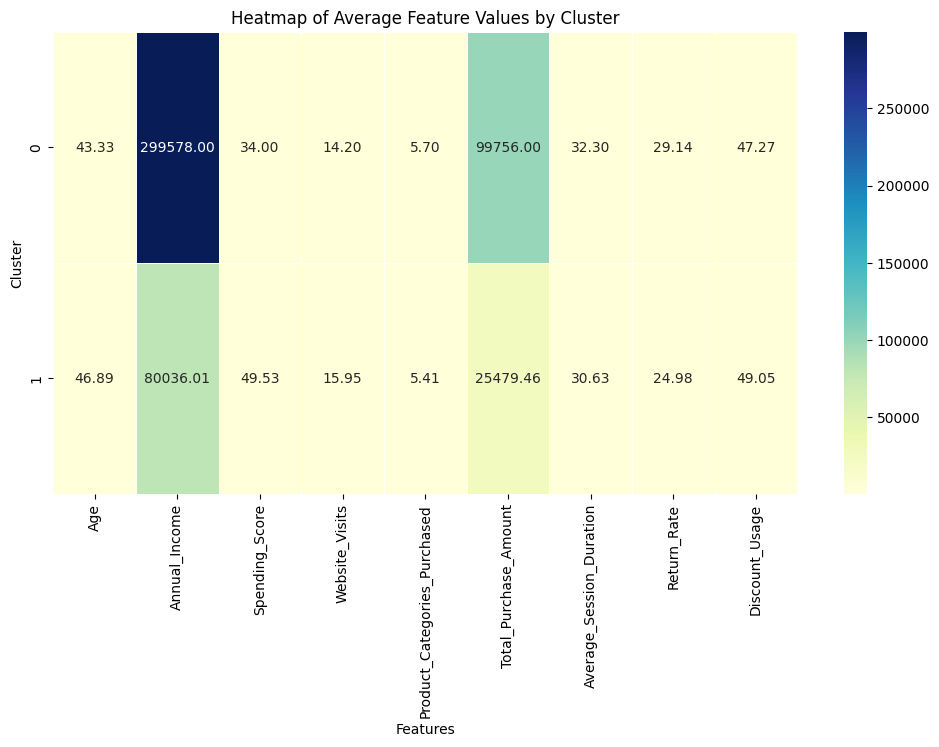

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    cluster_averages.drop(columns=['Customer_ID']),  # Dropping ID if present
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    linewidths=0.5
)

plt.title('Heatmap of Average Feature Values by Cluster')
plt.ylabel('Cluster')
plt.xlabel('Features')
plt.show()
